# 🚗 CO2 Emissions from New Passenger Cars (2000–2023)

This notebook analyzes the **average CO2 emissions per km from new passenger cars** across European countries, based on EEA/Eurostat data.  
We’ll clean the dataset, add EU-wide averages, and create visualizations to explore trends and country comparisons.


## 1. Setup & Data Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid", palette="tab10")

# Load CSV
df = pd.read_csv("eea_s_eu-sdg-13-31_p_2000-2023_v01_r00.csv")

# Keep only relevant columns
df = df[["geo", "geo_label", "time", "obs_value"]]

# Rename for clarity
df = df.rename(columns={
    "geo": "Country",
    "geo_label": "Country_Label",
    "time": "Year",
    "obs_value": "CO2_g_per_km"
})

# Convert year & emissions
df["Year"] = df["Year"].astype(int)
df["CO2_g_per_km"] = pd.to_numeric(df["CO2_g_per_km"], errors="coerce")

df.head()



,Country,Country_Label,Year,CO2_g_per_km
0,EU27_2020,European Union - 27 countries (from 2020),2000,NaN
1,EU27_2020,European Union - 27 countries (from 2020),2001,NaN
2,EU27_2020,European Union - 27 countries (from 2020),2002,NaN
3,EU27_2020,European Union - 27 countries (from 2020),2003,NaN
4,EU27_2020,European Union - 27 countries (from 2020),2004,NaN


## 2. Add EU Average
We calculate the EU average per year (mean across all available countries) and append it to the dataset.


In [3]:
df["Country_Label"] = df["Country_Label"].replace(
    "European Union - 27 countries (from 2020)", "EU Average"
)


In [4]:
import matplotlib as mpl

# Ensure subscript ₂ displays correctly
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'


## 3. Visualizations
We explore different aspects of CO2 emissions:
1. **Trend over time** (EU + selected countries)  
2. **Latest year comparison** (2023)  
3. **Change since 2000**  
4. **Range & average over time**


### 3.1 Trend Over Time (EU + Top Emitters)

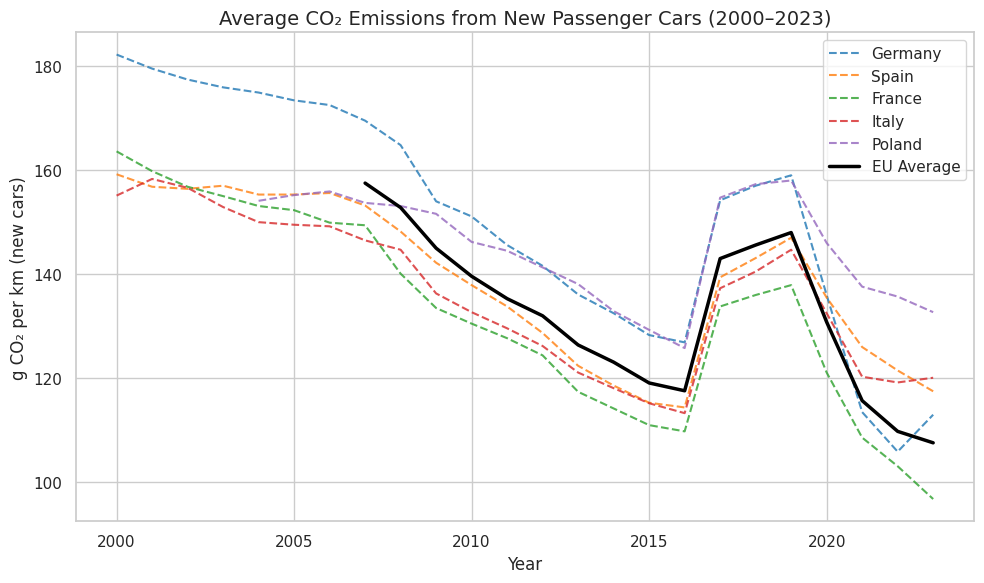

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert CO2 values to numeric
df["CO2_g_per_km"] = pd.to_numeric(df["CO2_g_per_km"], errors="coerce")

# Filter for EU and top emitters (Germany, France, Italy, Spain, Poland)
countries = ["EU27_2020", "DE", "FR", "IT", "ES", "PL"]
df_plot = df[df["Country"].isin(countries)].dropna(subset=["CO2_g_per_km"])

# Map country codes to readable labels
country_map = {
    "EU27_2020": "EU Average",
    "DE": "Germany",
    "FR": "France",
    "IT": "Italy",
    "ES": "Spain",
    "PL": "Poland"
}
df_plot["Country"] = df_plot["Country"].map(country_map)

# Plot
plt.figure(figsize=(10,6))

# Plot all except EU with dashed lines
for c in df_plot["Country"].unique():
    if c == "EU Average":
        continue
    subset = df_plot[df_plot["Country"] == c]
    plt.plot(subset["Year"], subset["CO2_g_per_km"], linestyle="--", label=c, alpha=0.8)

# Plot EU with solid bold line
eu = df_plot[df_plot["Country"] == "EU Average"]
plt.plot(eu["Year"], eu["CO2_g_per_km"], color="black", linewidth=2.5, label="EU Average")

plt.title("Average CO₂ Emissions from New Passenger Cars (2000–2023)", fontsize=14)
plt.ylabel("g CO₂ per km (new cars)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.legend()
plt.tight_layout()

#Save before show
plt.savefig("viz_3_1_trend.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### 3.2 Emissions by Country (Latest Year, e.g., 2023)

C:\Users\amali\AppData\Local\Temp\ipykernel_1848\3205862628.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\amali\AppData\Local\Temp\ipykernel_1848\3205862628.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


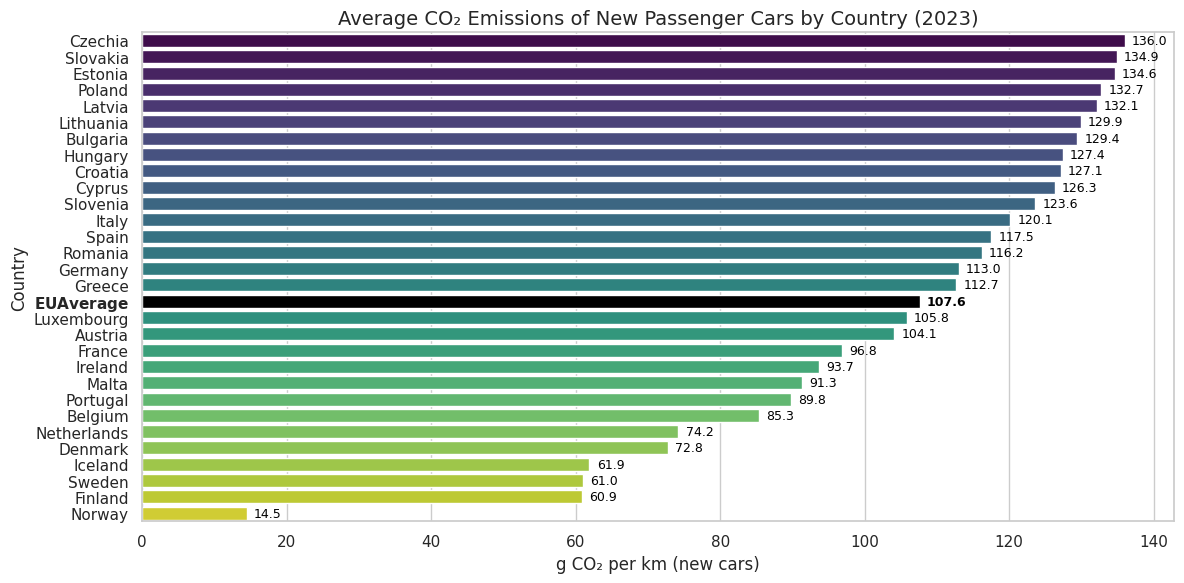

In [6]:
# Filter for latest year (2023)
latest_year = 2023
df_latest = df[df["Year"] == latest_year].dropna(subset=["CO2_g_per_km"])

# Sort by emissions
df_latest = df_latest.sort_values("CO2_g_per_km", ascending=False)

# Custom colors: black for EU, viridis for others
colors = [
    "black" if c == "EU27_2020" else plt.cm.viridis(i / len(df_latest))
    for i, c in enumerate(df_latest["Country"])
]

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_latest,
    x="CO2_g_per_km", y="Country_Label",
    palette=colors
)

# Add annotations at the end of each bar
for i, (value, country, code) in enumerate(zip(df_latest["CO2_g_per_km"], df_latest["Country_Label"], df_latest["Country"])):
    fontweight = "bold" if code == "EU27_2020" else "normal"
    ax.text(
        value + 1,  # shift slightly to the right
        i, 
        f"{value:.1f}", 
        va="center",
        ha="left",
        fontsize=9,
        color="black",
        fontweight=fontweight
    )

# Make y-axis labels bold for EU
labels = []
for country, code in zip(df_latest["Country_Label"], df_latest["Country"]):
    if code == "EU27_2020":
        labels.append(f"$\\bf{{{country}}}$")  # LaTeX-style bold
    else:
        labels.append(country)
ax.set_yticklabels(labels)

plt.title(f"Average CO₂ Emissions of New Passenger Cars by Country ({latest_year})", fontsize=14)
plt.xlabel("g CO₂ per km (new cars)", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.tight_layout()

#Save before show
plt.savefig("viz_3_2_emissions.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### 3.3 Change from 2000 to 2023

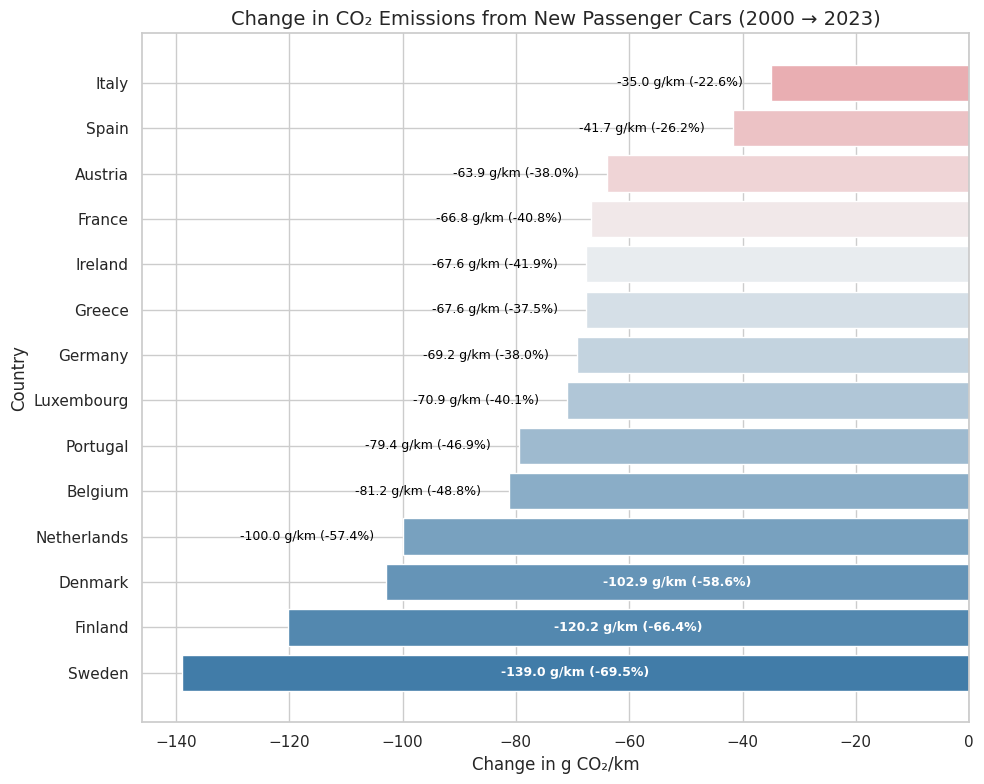

In [7]:
# 3.3 Change from 2000 to 2023

import matplotlib.pyplot as plt
import seaborn as sns

# Filter only 2000 and 2023
df_change = df[df["Year"].isin([2000, 2023])].copy()

# Pivot so we can calculate difference
df_change_pivot = df_change.pivot(index="Country_Label", columns="Year", values="CO2_g_per_km")

# Drop countries without both years
df_change_pivot = df_change_pivot.dropna()

# Calculate absolute and percentage change
df_change_pivot["Change"] = df_change_pivot[2023] - df_change_pivot[2000]
df_change_pivot["Pct Change"] = (df_change_pivot["Change"] / df_change_pivot[2000]) * 100

# Sort by change (biggest drop first)
df_change_sorted = df_change_pivot.sort_values("Change")

# Plot
plt.figure(figsize=(10,8))
bars = plt.barh(
    df_change_sorted.index,
    df_change_sorted["Change"],
    color=sns.diverging_palette(240, 10, n=20)
)

plt.axvline(0, color="black", linewidth=0.8)

plt.title("Change in CO₂ Emissions from New Passenger Cars (2000 → 2023)", fontsize=14)
plt.xlabel("Change in g CO₂/km", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Add labels (inside if long bar, outside if short)
for i, (chg, pct) in enumerate(zip(df_change_sorted["Change"], df_change_sorted["Pct Change"])):
    if abs(chg) > 100:  # long bar → label inside
        plt.text(
            chg/2, i,
            f"{chg:.1f} g/km ({pct:.1f}%)",
            va="center", ha="center",
            fontsize=9, color="white", fontweight="bold"
        )
    else:  # short bar → label outside
        plt.text(
            chg + (5 if chg > 0 else -5), i,
            f"{chg:.1f} g/km ({pct:.1f}%)",
            va="center",
            ha="left" if chg > 0 else "right",
            fontsize=9, color="black"
        )

plt.tight_layout()
#Save before show
plt.savefig("viz_3_3_change.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()


### 3.4 Range & Average Over Time

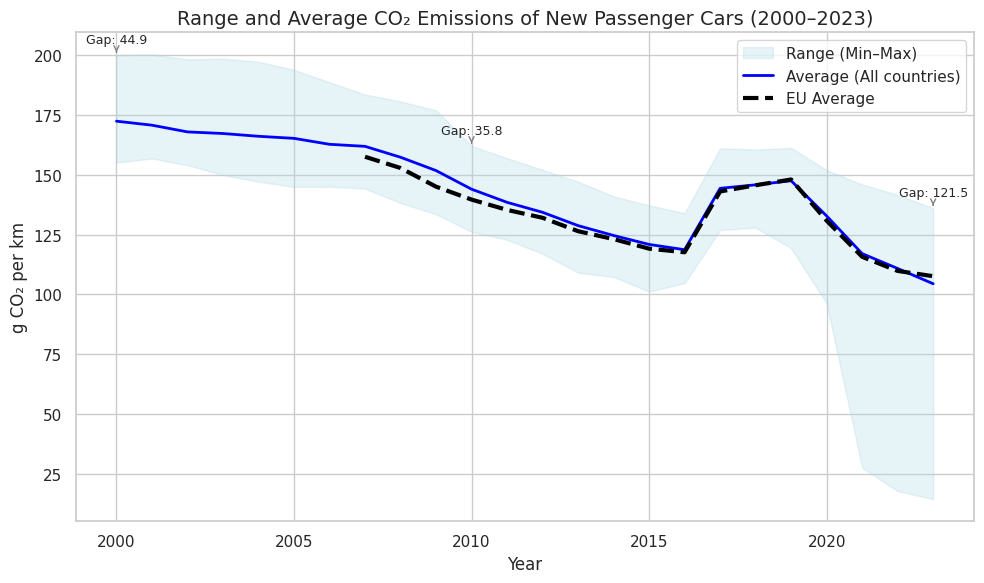

In [8]:
# Group by year to compute min, max, and average
df_range = df.groupby("Year").agg(
    min_val=("CO2_g_per_km", "min"),
    max_val=("CO2_g_per_km", "max"),
    mean_val=("CO2_g_per_km", "mean")
).reset_index()

# Extract EU Average
eu_avg = df[df["Country"] == "EU27_2020"]

# Plot
plt.figure(figsize=(10,6))

# Shaded area (range across all countries)
plt.fill_between(
    df_range["Year"], df_range["min_val"], df_range["max_val"],
    color="lightblue", alpha=0.3, label="Range (Min–Max)"
)

# Mean of all countries
plt.plot(
    df_range["Year"], df_range["mean_val"],
    color="blue", linewidth=2, label="Average (All countries)"
)

# EU Average (bold dashed)
plt.plot(
    eu_avg["Year"], eu_avg["CO2_g_per_km"],
    color="black", linewidth=3, linestyle="--", label="EU Average"
)

# Annotate range at key years
for year in [2000, 2010, 2023]:
    if year in df_range["Year"].values:
        row = df_range[df_range["Year"] == year].iloc[0]
        gap = row["max_val"] - row["min_val"]
        plt.annotate(
            f"Gap: {gap:.1f}",
            xy=(year, row["max_val"]),
            xytext=(year, row["max_val"]+5),
            ha="center", fontsize=9,
            arrowprops=dict(arrowstyle="->", color="gray", lw=1)
        )

# Titles & labels
plt.title("Range and Average CO₂ Emissions of New Passenger Cars (2000–2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("g CO₂ per km", fontsize=12)

# Legend
plt.legend(loc="upper right", frameon=True)

plt.tight_layout()

#Save before show
plt.savefig("viz_3_4_range.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()
